In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

### As we have the sales data in multiple files, our first job would be to merge all data in a single file.

In [2]:
path = 'Sales_Data/'
file_names = os.listdir(path)

In [3]:
file_names

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
type(file_names)

list

In [5]:
all_data = pd.DataFrame()

In [6]:
type(all_data)

pandas.core.frame.DataFrame

In [7]:
for i in file_names:
    fp=path+i
    print(fp)

Sales_Data/Sales_April_2019.csv
Sales_Data/Sales_August_2019.csv
Sales_Data/Sales_December_2019.csv
Sales_Data/Sales_February_2019.csv
Sales_Data/Sales_January_2019.csv
Sales_Data/Sales_July_2019.csv
Sales_Data/Sales_June_2019.csv
Sales_Data/Sales_March_2019.csv
Sales_Data/Sales_May_2019.csv
Sales_Data/Sales_November_2019.csv
Sales_Data/Sales_October_2019.csv
Sales_Data/Sales_September_2019.csv


In [8]:
for i in file_names:
    full_path = path+i
    temp = pd.read_csv(full_path)
    all_data = pd.concat([all_data, temp])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [10]:
all_data.to_csv('all_data.csv', index=False)

# **------------------------------------------------------------------------------------------**

## Now we have collected all 12 months of sales data into a single file, let's convert it into a dataframe

In [11]:
df = pd.read_csv('all_data.csv')

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### There are multiple null values in this dataset. So let's remove them firstly!

In [13]:
df.shape

(186850, 6)

In [14]:
df = df.dropna()

In [15]:
df.shape

(186305, 6)

In [16]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [17]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

# **------------------------------------------------------------------------------------------**

# Now as we have cleaned our data let's solve some business problems!

### **1. What was the best month for sales? How much was earned that month?**

In [18]:
# To Calculate month wise sales we need to formulate new columns for month and sales.

In [19]:
# Converting required fields to numeric data format
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(185950, 6)

In [22]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [23]:
df['Price Each'] = df['Price Each'].astype('float64')

In [24]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [25]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [26]:
df.Sales

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Sales, Length: 185950, dtype: float64

In [27]:
df['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object

In [28]:
df['Month'] = df['Order Date'].str[:2]

In [29]:
df['Month']

0         04
2         04
3         04
4         04
5         04
          ..
186845    09
186846    09
186847    09
186848    09
186849    09
Name: Month, Length: 185950, dtype: object

In [30]:
df['Date'] = df['Order Date'].str[3:5]
df['Date']

0         19
2         07
3         12
4         12
5         30
          ..
186845    17
186846    01
186847    23
186848    19
186849    30
Name: Date, Length: 185950, dtype: object

In [31]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,07
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,30
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95,04,29
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",99.99,04,02
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",11.95,04,12
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",1700.00,04,24
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",11.99,04,08


In [32]:
df['Month'] = df['Month'].astype(int)
df['Date'] = df['Date'].astype(int)

In [33]:
# Now that we have processed the data we need for solving the problem, let's go ahead.
df['Sales'] = df['Sales'].astype('float64')

In [34]:
# Let's group the sales data month wise.
monthly_sales = df.groupby('Month')['Sales'].sum()

In [35]:
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

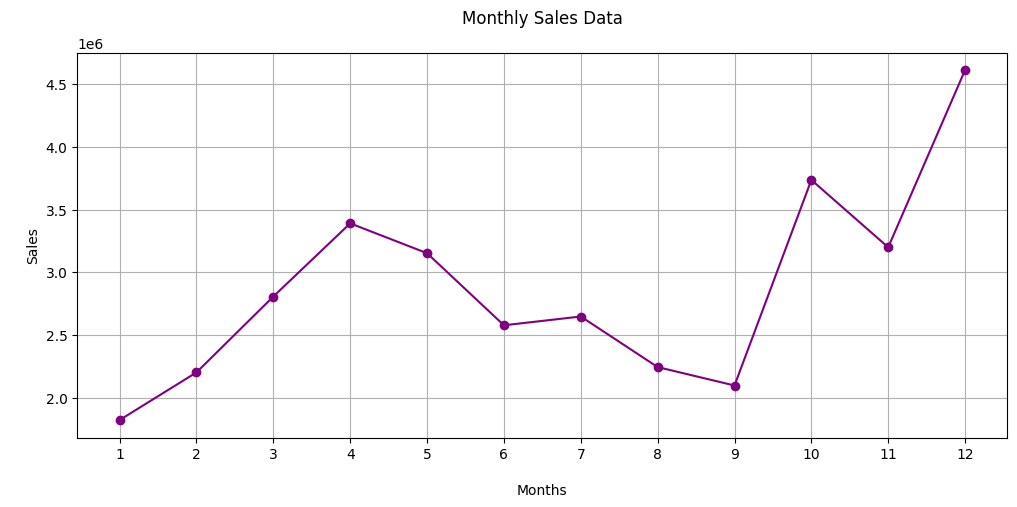

In [36]:
plt.figure(figsize=[12,5])
plt.title('Monthly Sales Data\n')
plt.plot(monthly_sales, marker='o', color='purple')
plt.xticks(np.arange(1,13,1))
plt.xlabel('\nMonths')
plt.ylabel('\nSales')
plt.grid()
plt.show()

#### We can see that through the visual representation of the calculated data, ***December*** month recorded the best sales in 2019.

# **------------------------------------------------------------------------------------------**

### **2. What city sold the most product?**

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,7
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,30


In [38]:
# As we don't have the separate column for city, let's create one!

In [39]:
df['City'] = df['Purchase Address'].str.split(', ').str[1]

In [40]:
set(df.City) # Displaying all unique cities

{'Atlanta',
 'Austin',
 'Boston',
 'Dallas',
 'Los Angeles',
 'New York City',
 'Portland',
 'San Francisco',
 'Seattle'}

In [41]:
# Let's group the sales data month wise.
city_wise_product_count = df.groupby('City')['Quantity Ordered'].sum()

In [42]:
city_wise_product_count

City
Atlanta          16602
Austin           11153
Boston           22528
Dallas           16730
Los Angeles      33289
New York City    27932
Portland         14053
San Francisco    50239
Seattle          16553
Name: Quantity Ordered, dtype: int32

In [43]:
c = pd.DataFrame({'City':city_wise_product_count.index, 'qty':city_wise_product_count})

In [44]:
c

,City,qty
City,,
Atlanta,Atlanta,16602
Austin,Austin,11153
Boston,Boston,22528
Dallas,Dallas,16730
Los Angeles,Los Angeles,33289
New York City,New York City,27932
Portland,Portland,14053
San Francisco,San Francisco,50239
Seattle,Seattle,16553


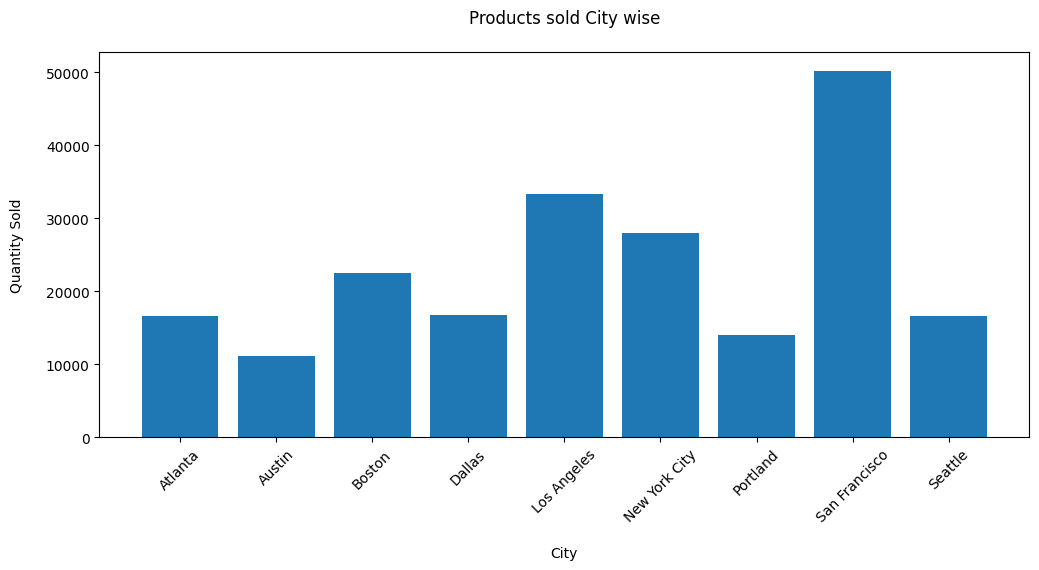

In [45]:
plt.figure(figsize=[12,5])
plt.title('Products sold City wise\n')
plt.bar(c.City, c.qty)
plt.xticks(rotation=45)
plt.xlabel('\nCity')
plt.ylabel('Quantity Sold\n')
plt.show()

#### From the above EDA, we can see that ***'San Fransisco' & 'Los Angeles'*** have sold relatively more products compared to other cities.

# **------------------------------------------------------------------------------------------**

### **3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?**

In [46]:
# Firstly we need to convert the order_date into datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\RAJ\AppData\Local\Temp\ipykernel_10756\793196191.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [47]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Date,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,Los Angeles


In [48]:
# Now after updating order_date column, now we can take out the hour values of the respective orders
df['Hour'] = df['Order Date'].dt.hour

In [49]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Date,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,Los Angeles,9


In [50]:
hourly = df.groupby('Hour')['Sales'].count()

In [51]:
hourly

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

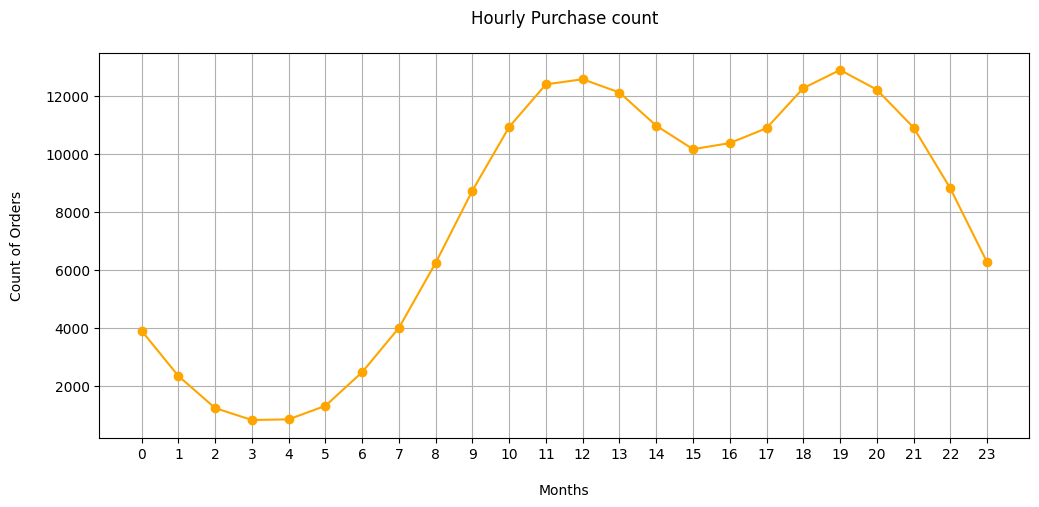

In [52]:
plt.figure(figsize=[12,5])
plt.title('Hourly Purchase count\n')
plt.plot(hourly, marker='o', color='orange')
plt.xticks(hourly.index)
plt.xlabel('\nMonths')
plt.ylabel('Count of Orders\n')
plt.grid()
plt.show()

#### From the above visualization, it is visible that customers mostly prefer to buy products between ***11am-1pm*** & ***6pm-8pm***

# **------------------------------------------------------------------------------------------**

### **4. What products are most often sold together?**

In [53]:
# For this we need to find rows where there are multiple products are bought under the same order_id

new_df = df[df['Order ID'].duplicated(keep=False)]

In [54]:
sold_together = new_df.groupby('Order ID')['Product'].agg(', '.join).copy()

In [55]:
sold_together = pd.DataFrame(sold_together)

In [56]:
sold_together

,Product
Order ID,
141275,"USB-C Charging Cable, Wired Headphones"
141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
141365,"Vareebadd Phone, Wired Headphones"
141384,"Google Phone, USB-C Charging Cable"
141450,"Google Phone, Bose SoundSport Headphones"
...,...
319536,"Macbook Pro Laptop, Wired Headphones"
319556,"Google Phone, Wired Headphones"
319584,"iPhone, Wired Headphones"


In [57]:
sold_together['count']=1

In [58]:
sold_together_count=sold_together.groupby('Product').count()

In [59]:
df2 = pd.DataFrame(sold_together_count.sort_values(by='count', ascending=False).head(10))

In [60]:
df2

,count
Product,
"iPhone, Lightning Charging Cable",882
"Google Phone, USB-C Charging Cable",856
"iPhone, Wired Headphones",361
"Vareebadd Phone, USB-C Charging Cable",312
"Google Phone, Wired Headphones",303
"iPhone, Apple Airpods Headphones",286
"Google Phone, Bose SoundSport Headphones",161
"Vareebadd Phone, Wired Headphones",104
"Google Phone, USB-C Charging Cable, Wired Headphones",77


In [61]:
df2 = df2.assign(products = df2.index)

In [62]:
df2 = df2[['products', 'count']]

In [63]:
df2

,products,count
Product,,
"iPhone, Lightning Charging Cable","iPhone, Lightning Charging Cable",882
"Google Phone, USB-C Charging Cable","Google Phone, USB-C Charging Cable",856
"iPhone, Wired Headphones","iPhone, Wired Headphones",361
"Vareebadd Phone, USB-C Charging Cable","Vareebadd Phone, USB-C Charging Cable",312
"Google Phone, Wired Headphones","Google Phone, Wired Headphones",303
"iPhone, Apple Airpods Headphones","iPhone, Apple Airpods Headphones",286
"Google Phone, Bose SoundSport Headphones","Google Phone, Bose SoundSport Headphones",161
"Vareebadd Phone, Wired Headphones","Vareebadd Phone, Wired Headphones",104
"Google Phone, USB-C Charging Cable, Wired Headphones","Google Phone, USB-C Charging Cable, Wired Head...",77


In [64]:
prod_list=list(df2.index)
prod_list

['iPhone, Lightning Charging Cable',
 'Google Phone, USB-C Charging Cable',
 'iPhone, Wired Headphones',
 'Vareebadd Phone, USB-C Charging Cable',
 'Google Phone, Wired Headphones',
 'iPhone, Apple Airpods Headphones',
 'Google Phone, Bose SoundSport Headphones',
 'Vareebadd Phone, Wired Headphones',
 'Google Phone, USB-C Charging Cable, Wired Headphones',
 'Vareebadd Phone, Bose SoundSport Headphones']

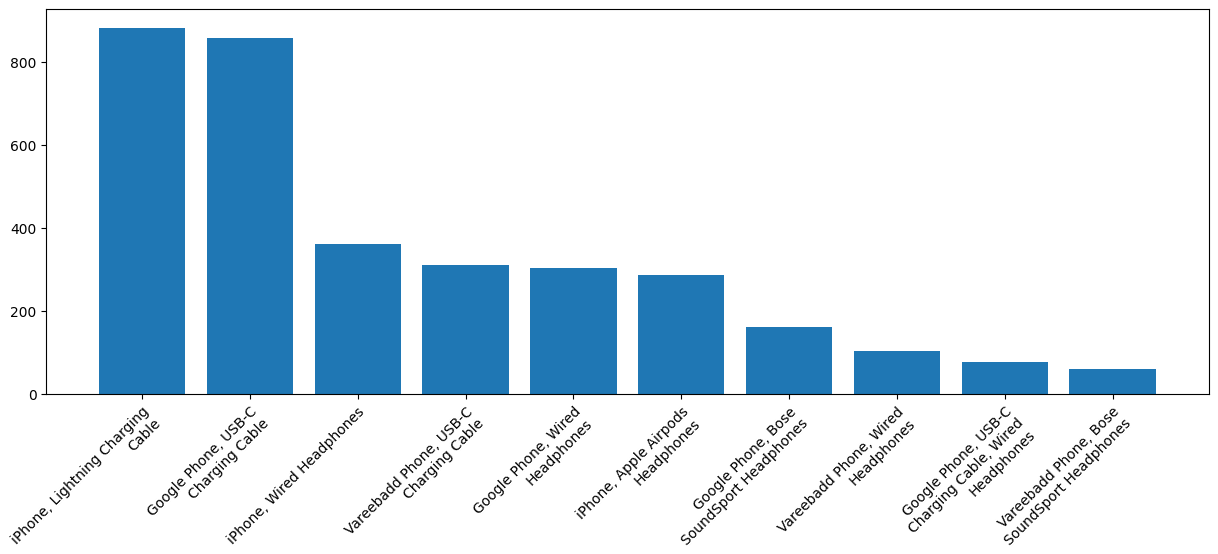

In [65]:
plt.figure(figsize=[15,5])
plt.bar(prod_list, df2['count'])
plt.xticks(prod_list, rotation=45, wrap=True, ha='right')
plt.show()

#### Above are the top 10 products which the customers tend to buy together.

# **------------------------------------------------------------------------------------------**

### **5. What product sold the most? Why do you think it sold the most?**

In [66]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Date,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,Los Angeles,9


In [67]:
df['counts']=1

In [68]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Date,City,Hour,counts
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,Dallas,8,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,Boston,22,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,Los Angeles,14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,Los Angeles,14,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,Los Angeles,9,1


In [69]:
most_sold = pd.DataFrame(df.groupby('Product')['Quantity Ordered'].sum())
most_sold

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


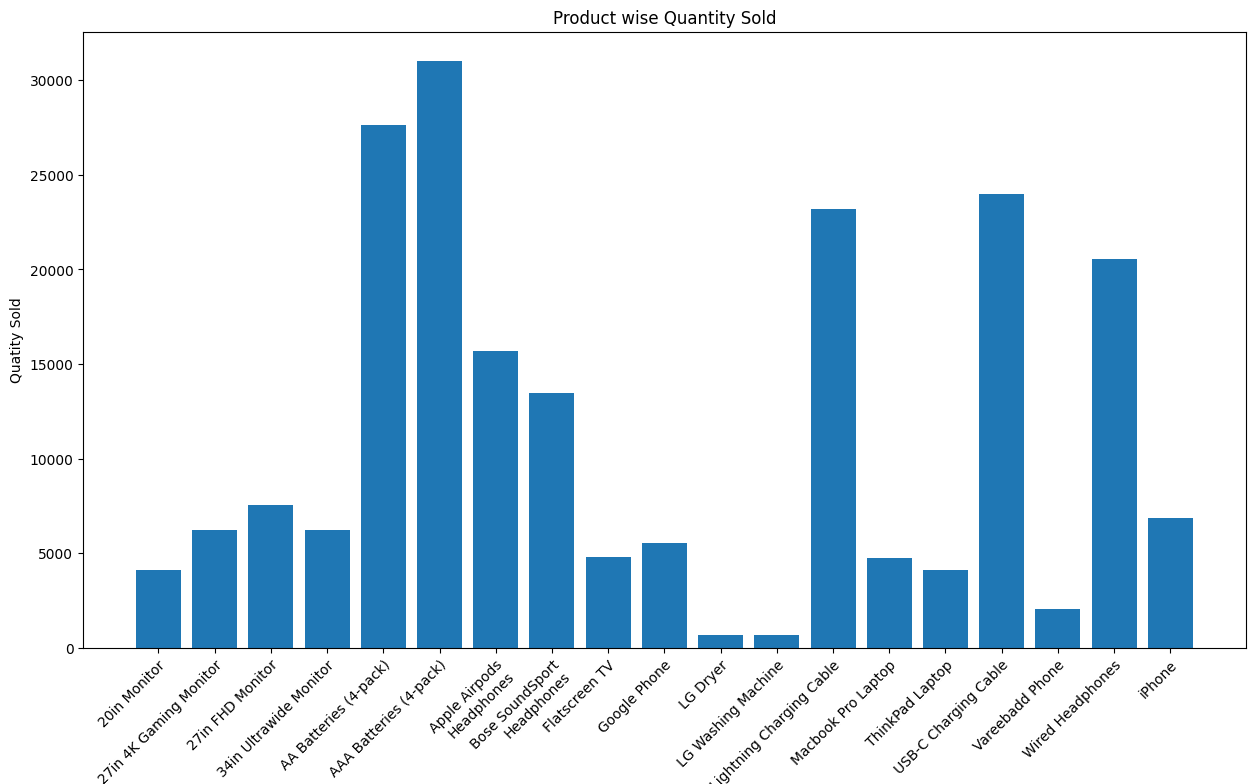

In [70]:
plt.figure(figsize=[15,8])
plt.title('Product wise Quantity Sold')
plt.bar(most_sold.index, most_sold['Quantity Ordered'])
plt.xlabel('Product Name')
plt.ylabel('Quatity Sold')
plt.xticks(most_sold.index, rotation=45, wrap=True, ha='right')
plt.show()

In [71]:
# Trying to co-relate the quatity sold to the unit price of the product
most_sold['unit_price'] = df.groupby('Product')['Price Each'].unique()

In [72]:
most_sold.head()

,Quantity Ordered,unit_price
Product,,
20in Monitor,4129,[109.99]
27in 4K Gaming Monitor,6244,[389.99]
27in FHD Monitor,7550,[149.99]
34in Ultrawide Monitor,6199,[379.99]
AA Batteries (4-pack),27635,[3.84]


In [73]:
# The unit price we got is in the form of numpy array. Let's cobnvert it into the float format
most_sold.unit_price = most_sold.unit_price.astype('float')
most_sold.head()

,Quantity Ordered,unit_price
Product,,
20in Monitor,4129,109.99
27in 4K Gaming Monitor,6244,389.99
27in FHD Monitor,7550,149.99
34in Ultrawide Monitor,6199,379.99
AA Batteries (4-pack),27635,3.84


C:\Users\RAJ\AppData\Local\Temp\ipykernel_10756\1233611994.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(most_sold.index, rotation=90, size = 10)


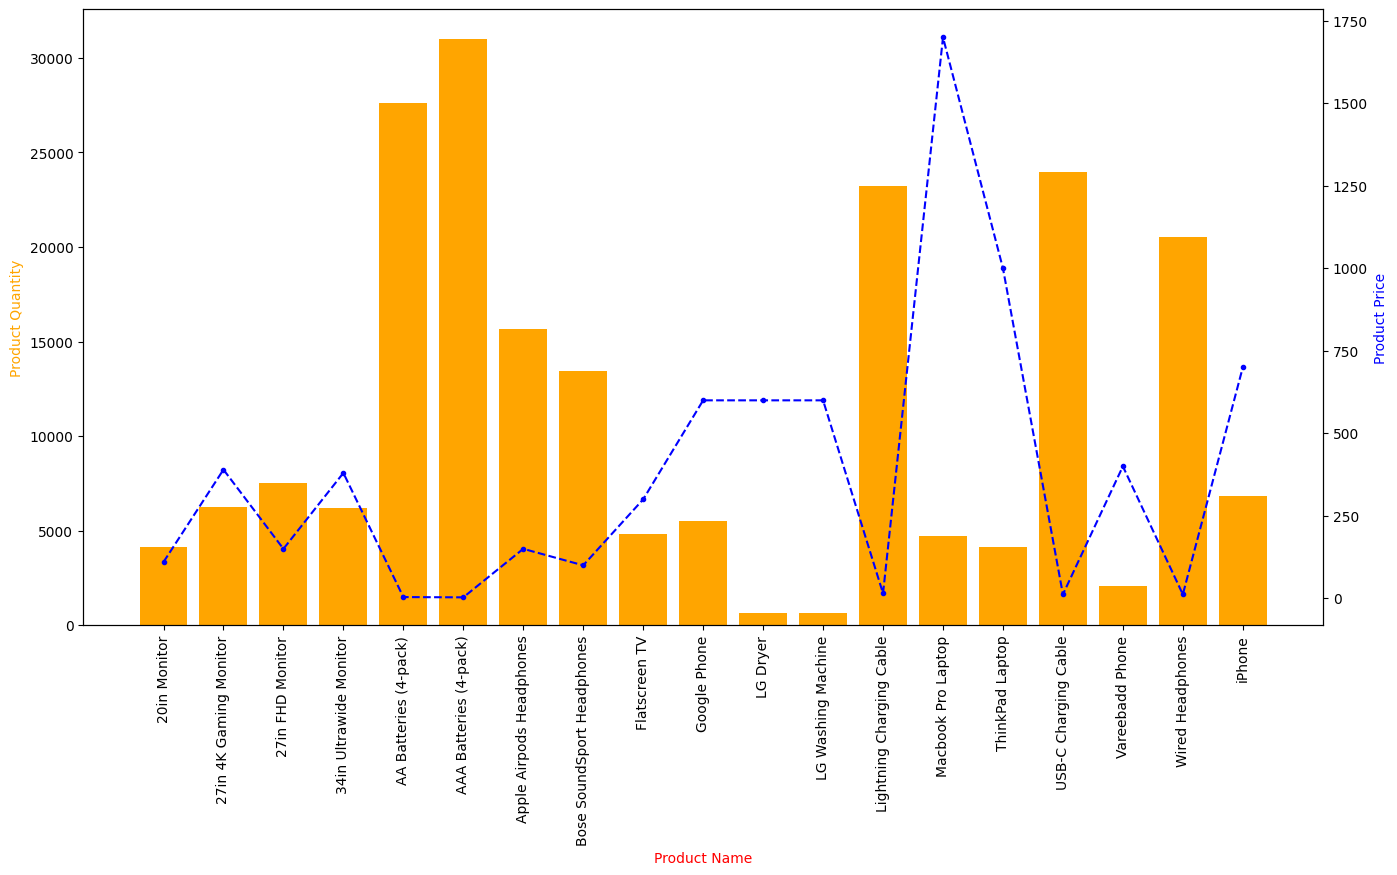

In [74]:
# Trying to co-relate the quatity sold to the unit price of the product


fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(16)
ax2 = ax1.twinx()

ax1.bar(most_sold.index, most_sold['Quantity Ordered'], color='orange')
ax2.plot(most_sold.index, most_sold.unit_price, 'b.--')

ax1.set_xlabel('Product Name', color='red')
ax1.set_ylabel('Product Quantity', color='#FFA500')
ax2.set_ylabel('Product Price', color='blue')
ax1.set_xticklabels(most_sold.index, rotation=90, size = 10)
plt.show()

***From the above visualization, we can notice that the products with the largest quantity sold have lesser values. That means the user are purchasing the products with the lesser unit price more.***